<div style="text-align: center;">
    <h1>PROJECT P8
    <h1><b>MLD Visualization and Imbalance</h1>
    <p><b>Gillio Francesco Giuseppe</b></p>
    <p>Seminario Yrigo̱yen César Augusto</b></p>
    <h3>Applied Data Science Project</h3>
    <p><i>Polytechnic University of Turin - Italy</i></p>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations #for label sets imbalance
import sys

#P8 polito github - project import
#!git clone https://github.com/adsp-polito/2024-P8-PPS.git
#path_to_module = '/content/utils.py'
path_to_module = '/Users/cesaraugustoseminarioyrigoyen/Documents/CORSI/DATA_SCIENCE_POLI/3_year/Applied Data science/P8-project/PPS-MLC/functions/utils.py'
sys.path.append(path_to_module)
import os
sys.path.append(os.path.dirname(path_to_module))
import utils

# dataset_CA=pd.read_excel('/content/2024-P8-PPS/data/DB_clinical_areas.xlsx')
# dataset_Interventions=pd.read_excel('/content/2024-P8-PPS/data/DB_interventions.xlsx')

dataset_CA=pd.read_excel('/Users/cesaraugustoseminarioyrigoyen/Documents/CORSI/DATA_SCIENCE_POLI/3_year/Applied Data science/P8-project/2024-P8-PPS/data/DB_clinical_areas.xlsx')
dataset_Interventions=pd.read_excel('/Users/cesaraugustoseminarioyrigoyen/Documents/CORSI/DATA_SCIENCE_POLI/3_year/Applied Data science/P8-project/2024-P8-PPS/data/DB_interventions.xlsx')


/Users/cesaraugustoseminarioyrigoyen/miniconda3/lib/python3.10/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


# **Visualization**

## Clinical Areas dataset

**Labels**

In [2]:
print(f"size of clinical areas dataset: {dataset_CA.shape}")
dataset_CA.head(3)

size of clinical areas dataset: (2192, 14)


,Title,Abstract,Gynecology,Respiratory diseases,Renal diseases,Mental health disorders,Neurological diseases,Musculoskeletal diseases,Hematological diseases,Oncological diseases,Cardiovascular diseases,Gastrointestinal diseases,Endocrine diseases,Dental diseases
0,Factors Influencing Polish Women's Preference ...,Background and Objectives: Shared-decision mak...,1,0,0,0,0,0,0,0,0,0,0,0
1,Engaging psoriasis patients in adherence and o...,This article is based on a presentation given ...,0,0,0,0,0,0,0,0,0,0,0,0
2,Cross-sectional Survey Examining Patient Attit...,<b>Background.</b> Early in the COVID-19 pande...,0,0,0,0,0,0,0,1,0,1,0,0


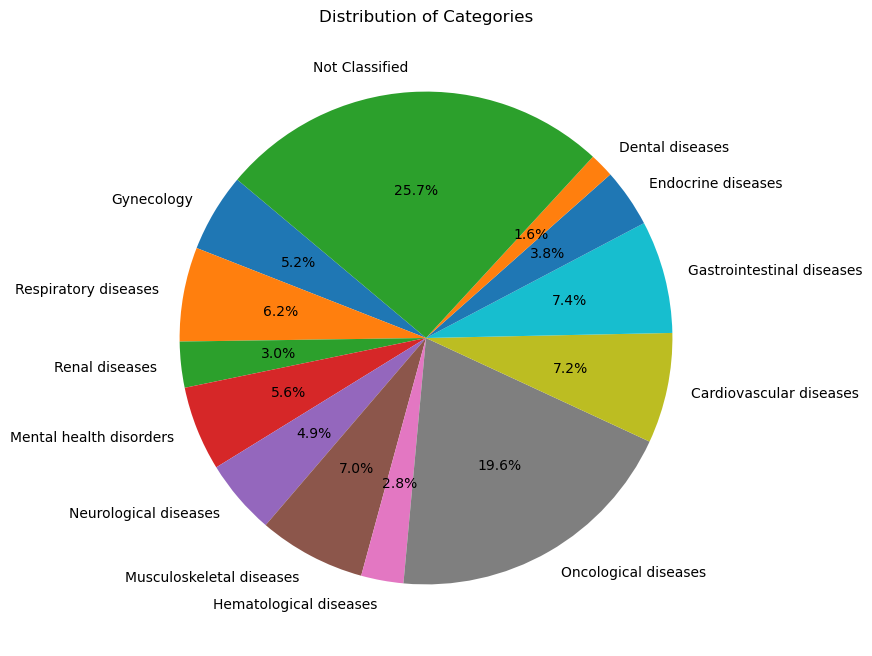

In [3]:
utils.plotpiechart(dataset_CA)

**Title & abstracts**

Anomalies: text empty or nan value

In [4]:
print("Clinical areas dataset - words stats")
stats_CA=utils.show_stats_of_titles_abstracts(dataset_CA)

Clinical areas dataset - words stats
Average Title Length: 14.65 words
Average Abstract Length: 242.98 words
Number of rows with Anomalies in the Title: 0
Number of rows with Anomalies in the Abstract: 54


Text Distribution


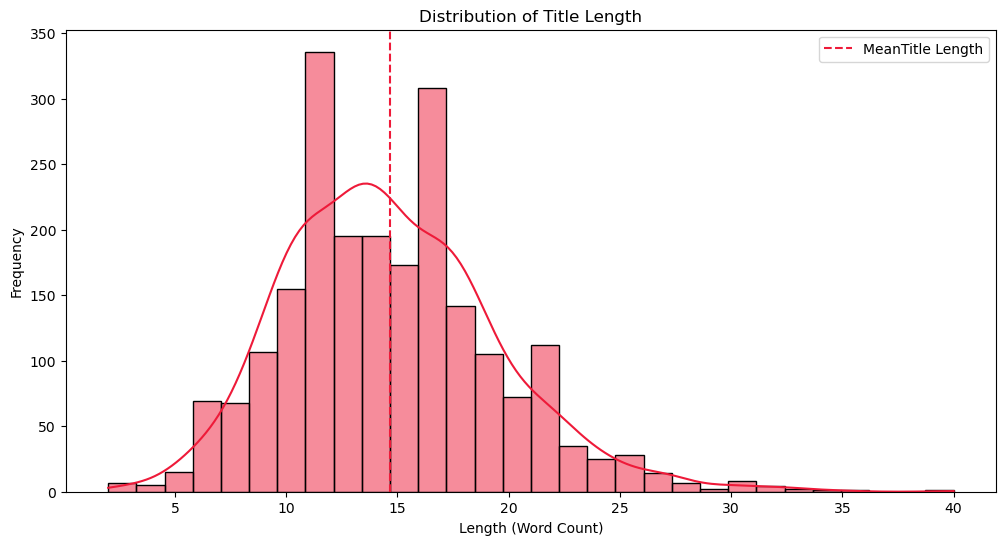

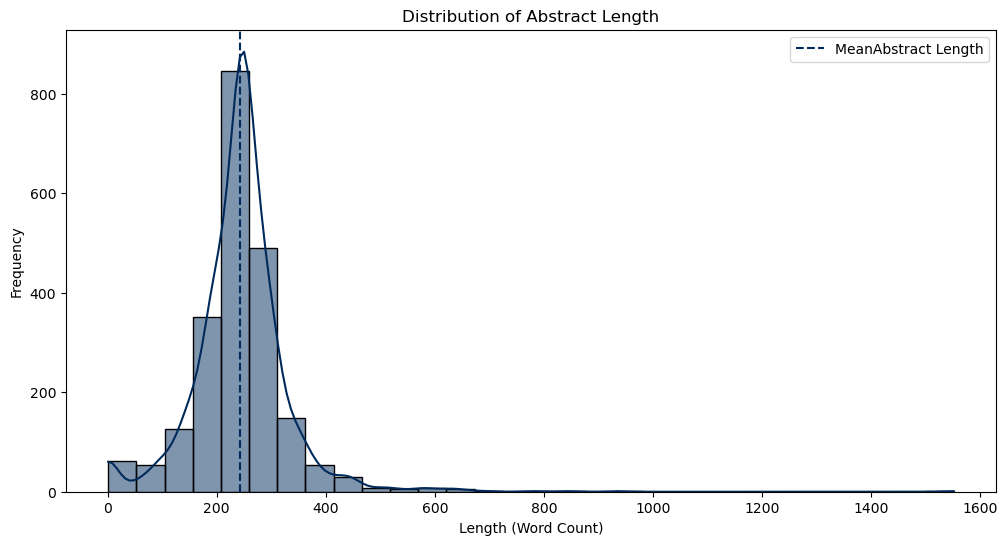

In [5]:
print("Text Distribution")
utils.show_distributions(stats_CA,'Title Length',col='#EE1A39')
utils.show_distributions(stats_CA,'Abstract Length',col='#002A5C')

## Interventions dataset

**Labels**

In [6]:
print(f"size of interventions dataset: {dataset_Interventions.shape}")
dataset_Interventions.head(3)

size of interventions dataset: (2192, 8)


,Title,Abstract,telemedicine,imaging,surgery,drug,screening,device
0,factor influencing polish woman mode delivery ...,background objective shareddecision become tre...,0,0,1,0,0,0
1,engaging psoriasis adherence outcome topical t...,article based presentation given author satell...,0,0,0,1,0,0
2,crosssectional examining attitude rescheduling...,background early pandemic colonoscopy colorect...,0,1,0,0,1,0


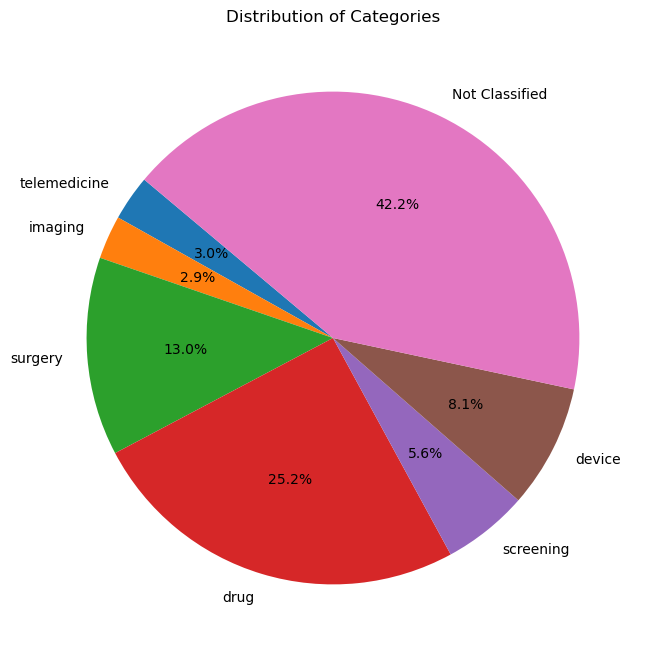

In [7]:
utils.plotpiechart(dataset_Interventions) # function is in the below functions 1 section. Idea is to put this functions in a separated file and be imported

**Title and Abstract**

Anomalies: empty or nan values

In [8]:
print("\nInterventions dataset - words stats")
stats_Int=utils.show_stats_of_titles_abstracts(dataset_Interventions)


Interventions dataset - words stats
Average Title Length: 7.09 words
Average Abstract Length: 124.25 words
Number of rows with Anomalies in the Title: 22
Number of rows with Anomalies in the Abstract: 54


Text Distribution


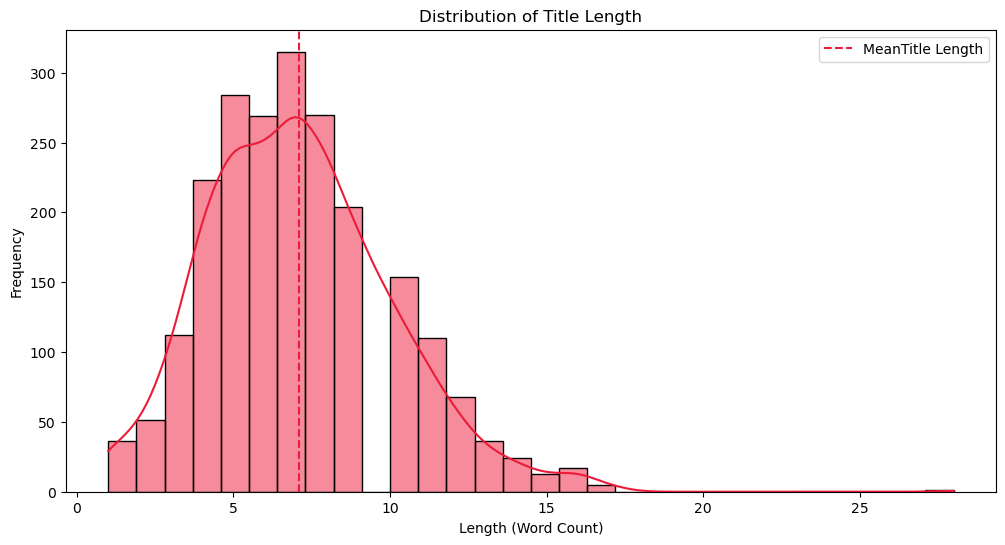

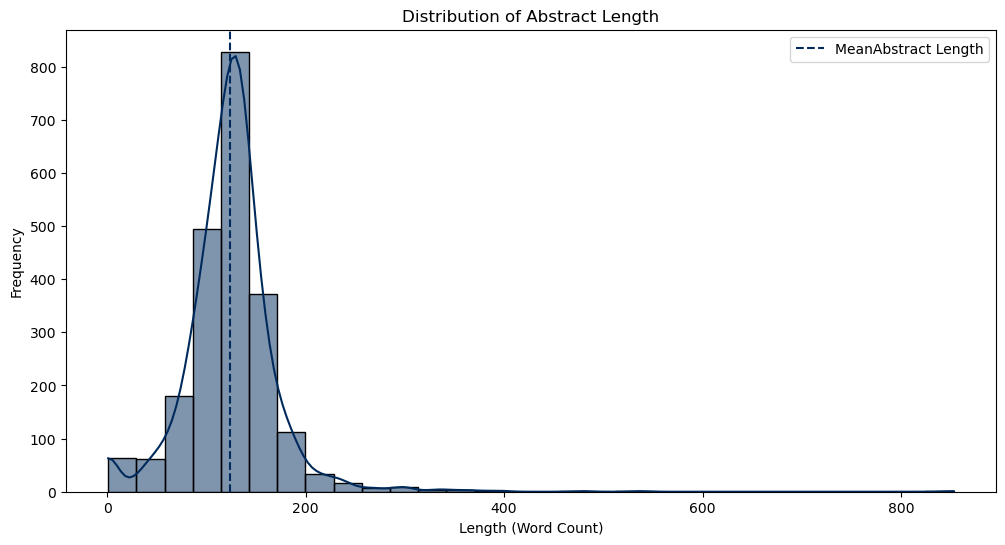

In [9]:
print("Text Distribution")
utils.show_distributions(stats_Int,'Title Length',col='#EE1A39')
utils.show_distributions(stats_Int,'Abstract Length',col='#002A5C')

# **Imbalance problem visualization**

### **Dataset imbalance plots**
Three different problem visualizations:
1. Imbalance *Within* labels
2. Imbalance *Between* labels
3. Imbalance *Among labelsets*

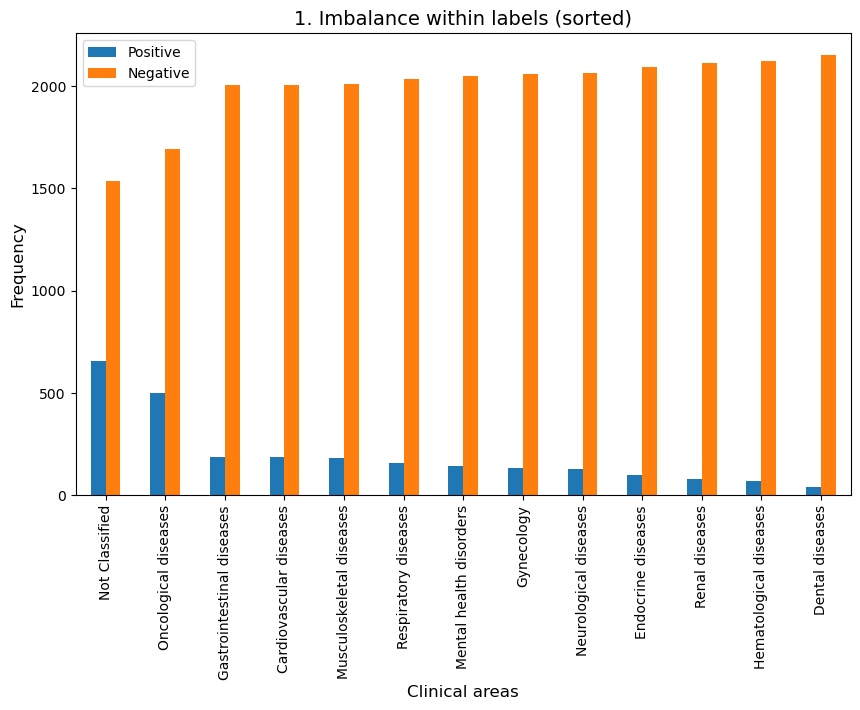

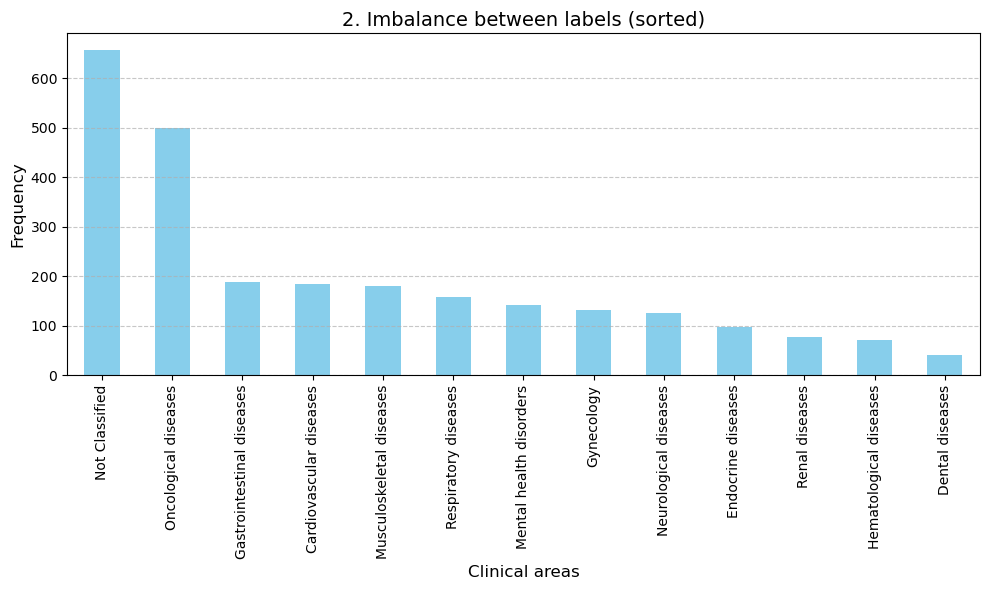


Dataset of Clinical areas
Imbalance among labelsets:

                                            Label Set  Frequency
0                                    (Not Classified)        658
1                              (Oncological diseases)        278
2                          (Musculoskeletal diseases)        158
3                           (Cardiovascular diseases)        126
4                           (Mental health disorders)        125
..                                                ...        ...
83  (Mental health disorders, Hematological diseases)          1
84  (Musculoskeletal diseases, Gastrointestinal di...          1
85        (Musculoskeletal diseases, Dental diseases)          1
86                (Gynecology, Neurological diseases)          1
87  (Oncological diseases, Cardiovascular diseases...          1

[88 rows x 2 columns]


In [10]:
labelsets_CA=utils.show_imbalance_on(dataset_CA,'Clinical areas')

In [11]:
utils.calculate_other_metrics(dataset_CA.iloc[:,2:],labelsets_CA)

Card: 0.866
Density: 0.072
TCS: 13.595


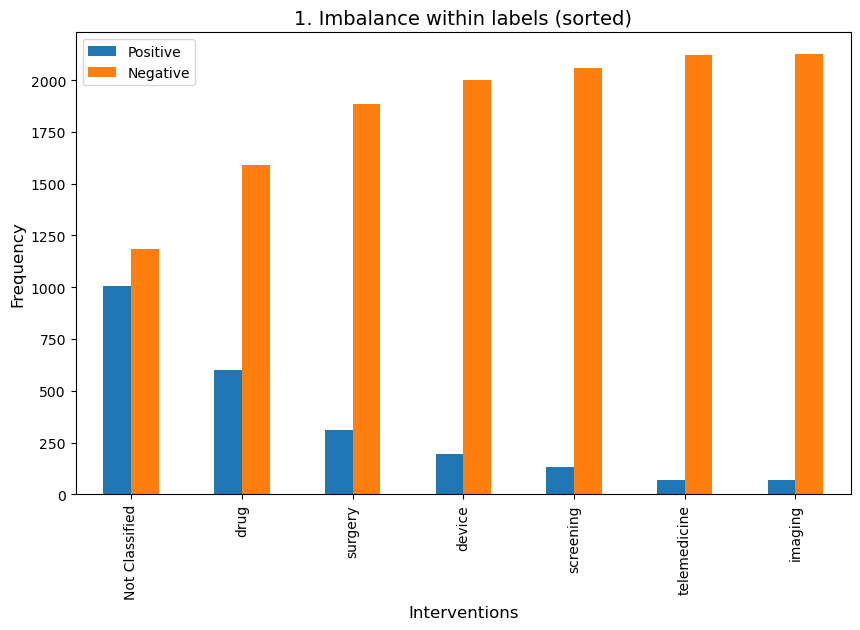

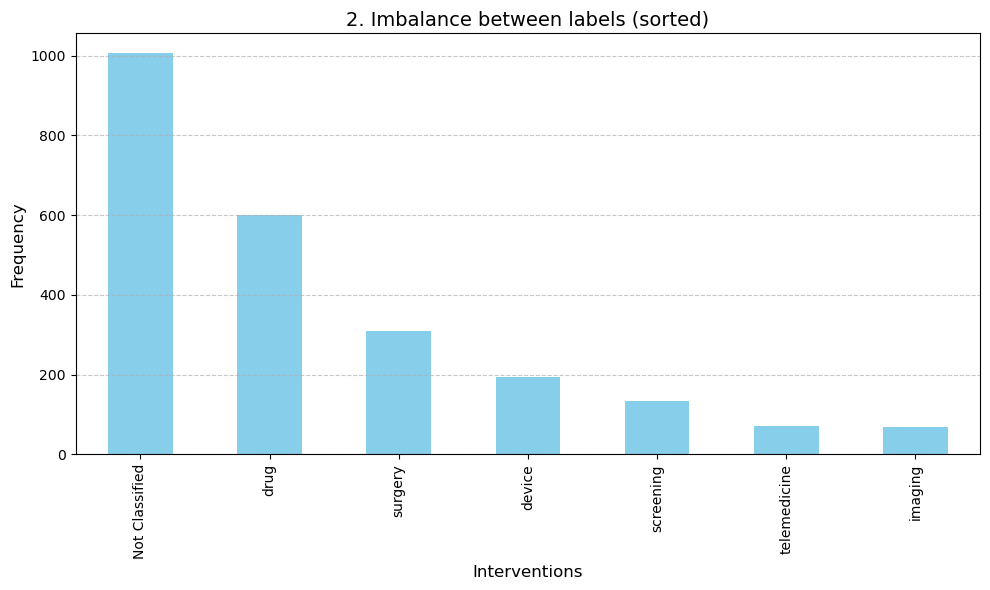


Dataset of Interventions
Imbalance among labelsets:

                        Label Set  Frequency
0                (Not Classified)       1006
1                          (drug)        513
2                       (surgery)        214
3                     (screening)         98
4                        (device)         92
5                  (telemedicine)         64
6               (device, surgery)         49
7                  (device, drug)         36
8                 (surgery, drug)         33
9                       (imaging)         31
10           (screening, imaging)         29
11        (device, surgery, drug)         10
12      (telemedicine, screening)          3
13           (telemedicine, drug)          3
14     (device, surgery, imaging)          2
15              (screening, drug)          2
16                (drug, imaging)          1
17             (surgery, imaging)          1
18  (screening, surgery, imaging)          1
19   (device, screening, imaging)          1
2

In [12]:
labelsets_Int=utils.show_imbalance_on(dataset_Interventions,'Interventions')

In [13]:
utils.calculate_other_metrics(dataset_Interventions.iloc[:,2:],labelsets_Int)

Card: 0.628
Density: 0.105
TCS: 11.527


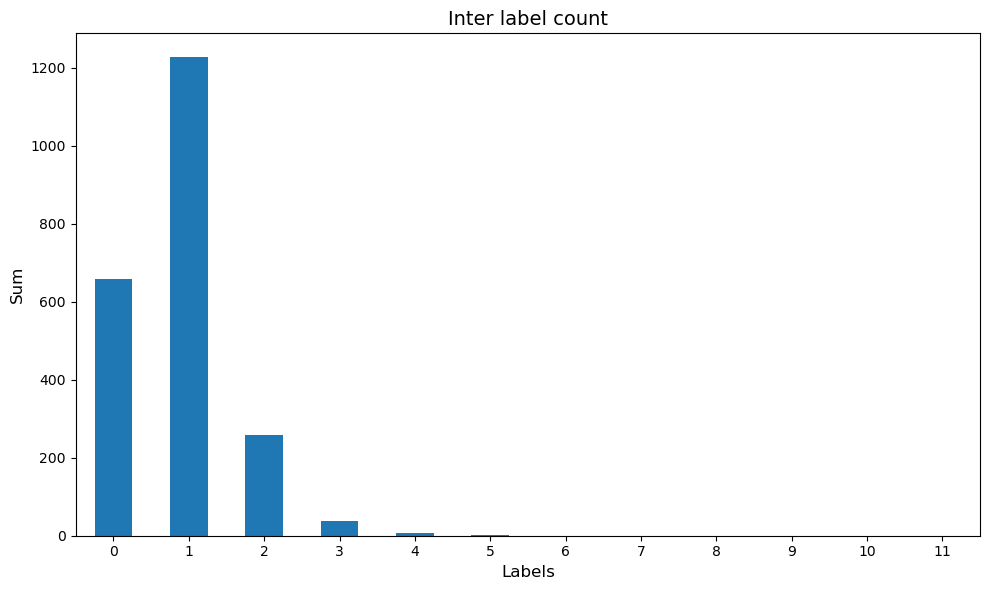

In [14]:
dataset_CA=utils.show_simultaneous_labels(dataset_CA, n_labels=len(dataset_CA.columns[2:]))
# Following plots show how many papers have just one label, two labels, etc. simultaneously

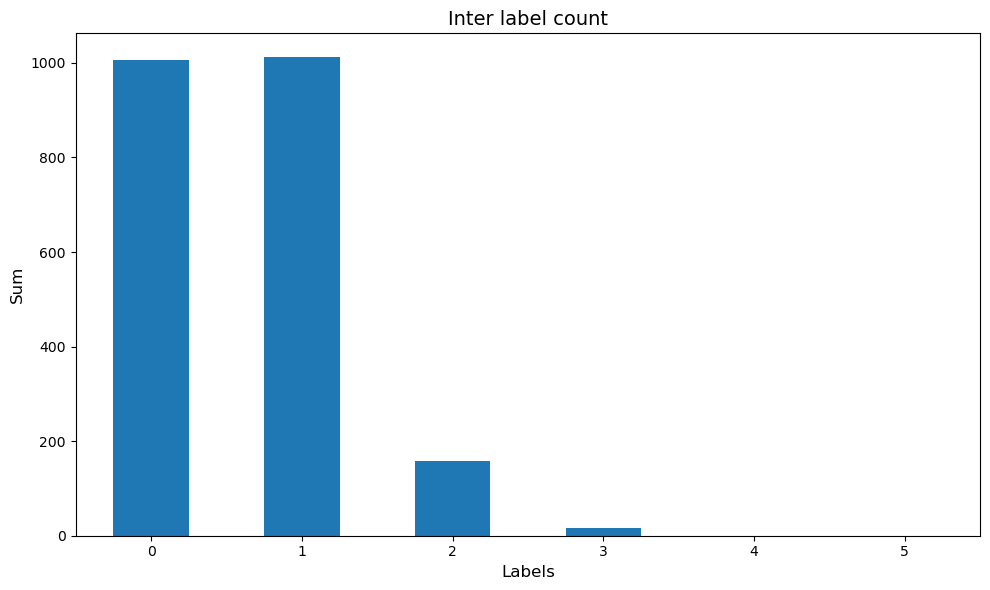

In [15]:
dataset_Interventions=utils.show_simultaneous_labels(dataset_Interventions, n_labels=len(dataset_Interventions.columns[2:]))

## **MLD Characterization measures**

### 1. Basic information
Number of samples, attributes, labels, label-sets

In [16]:
dataset_CA.info()
print(f"\nNumber of labels: {dataset_CA.iloc[:, 2:].shape[1]}")
print(f"Number of label-sets with at least one true label: {labelsets_CA.shape[0]}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Title                      2192 non-null   object
 1   Abstract                   2138 non-null   object
 2   Gynecology                 2192 non-null   int64 
 3   Respiratory diseases       2192 non-null   int64 
 4   Renal diseases             2192 non-null   int64 
 5   Mental health disorders    2192 non-null   int64 
 6   Neurological diseases      2192 non-null   int64 
 7   Musculoskeletal diseases   2192 non-null   int64 
 8   Hematological diseases     2192 non-null   int64 
 9   Oncological diseases       2192 non-null   int64 
 10  Cardiovascular diseases    2192 non-null   int64 
 11  Gastrointestinal diseases  2192 non-null   int64 
 12  Endocrine diseases         2192 non-null   int64 
 13  Dental diseases            2192 non-null   int64 
dtypes: int64

In [17]:
dataset_Interventions.info()
print(f"\nNumber of labels: {dataset_Interventions.iloc[:, 2:].shape[1]}")
print(f"Number of label-sets with at least one true label: {labelsets_Int.shape[0]}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         2170 non-null   object
 1   Abstract      2138 non-null   object
 2   telemedicine  2192 non-null   int64 
 3   imaging       2192 non-null   int64 
 4   surgery       2192 non-null   int64 
 5   drug          2192 non-null   int64 
 6   screening     2192 non-null   int64 
 7   device        2192 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 137.1+ KB

Number of labels: 6
Number of label-sets with at least one true label: 23




> ❗**Both datasets** are **equal** in terms of text and titles. Not literally but in article contents. Titles and abstracts from *clinical areas* dataset will be considered for embedding purposes as seem to be more accurate



### 2. Imbalance level measure


In [18]:
IRLbl_CA,_,_,_,scumble_CA=utils.find_imbalance_level_measures(dataset_CA)


Imbalance Ratios:
Dental diseases              12.195122
Hematological diseases        7.042254
Renal diseases                6.493506
Endocrine diseases            5.102041
Neurological diseases         3.968254
Gynecology                    3.787879
Mental health disorders       3.521127
Respiratory diseases          3.164557
Musculoskeletal diseases      2.777778
Cardiovascular diseases       2.702703
Gastrointestinal diseases     2.645503
Oncological diseases          1.000000
dtype: float64
Mean imbalance ratio: 4.533
Max imbalance ratio: 12.195
Coefficient of variation of imbalance ratio: 1.913


In [19]:
IRLbl_Int,_,_,_,scumble_int=utils.find_imbalance_level_measures(dataset_Interventions)


Imbalance Ratios:
imaging         8.823529
telemedicine    8.450704
screening       4.477612
device          3.108808
surgery         1.935484
drug            1.000000
dtype: float64
Mean imbalance ratio: 4.633
Max imbalance ratio: 8.824
Coefficient of variation of imbalance ratio: 2.373


### 3. Concurrence level measure

In [20]:
print(f"Clinical areas dataset - SCUMBLE: {scumble_CA:.4f}")
print(f"Interventions dataset - SCUMBLE: {scumble_int:.4f}")

Clinical areas dataset - SCUMBLE: 0.6254
Interventions dataset - SCUMBLE: 0.4445




> Intervention dataset is more imbalanced respect to the interventions.

Higher IR  

